# Homework 2: Linear Regression
by Yousif Khaireddin and Sadie Allen

**Due date**: February 17, Wednesday by 11:59pm


## **Question 1:** Ridge regression derivation

**Throughout the following, please adhere to the following definitions**

$
n = number\ of\ samples \\
d = number\ of\ features \\
$

$
X = samples \in \mathcal{R}^{n x d}\\
y = labels \in \mathcal{R}^n \\
w = weight\ matrix \in \mathcal{R}^d
$

In class, we have derived the closed form solution for OLS Regression. 

$
loss = \sum_{i=0}^{n}||y_i - \sum_{j=0}^{d}x_{ij}w_j||^2 = (\textbf{y} - \textbf{Xw})^T (\textbf{y} - \textbf{Xw})
$
<br>


The optimal value for the parameter $\textbf{w}$ is given by

$
\textbf{w*} = (\textbf{X}^T \textbf{X})^{-1}\ \textbf{X}^T \textbf{y} \\
$

To control the variance of the parameters and avoid them growing to infinity and help with overfitting, ridge regression tries to regularize the loss fuction using w, shown below:
<br><br>


$
loss = (\textbf{y} - \textbf{Xw})^T (\textbf{y} - \textbf{Xw} ) + \lambda ||\textbf{w}||^2_2
$
<br><br>


The degree to which this regularization impacts the loss function is controlled by the $\lambda$ parameter. This is a hyper-parameter which must be tuned using a validation set.

<br>


Derive the closed form solution of ridge regression using the same workflow used in class to derive OLS.

**Hint:** You are trying to minimize the loss w.r.t. to $w$   


**Answer:**


## **Question 2:**  Relationship between Lasso Regression and Maximum a posteriori estimation

As we have previously discussed in class, in linear regression, we can consider $y$ to be the product of the weight vector with the sample with some added noise factor. 

$ y = w^Tx + \mathcal{N} (0, \sigma^2) $

So, each $y_i$ is distributed according to a gaussian distribution goverend by the noise, and mean-shifted by $w^Tx$

$y \sim \mathcal{N} (w^Tx, \sigma^2)$

$p(y|x, w) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\sum_{i=1}^{n} \frac{-(y_i - x_i^Tw)^2}{2\sigma^2}} $
<br><br>


Additionally, assume the prior of the model is Laplacian whose coefficients are iid with zero mean and scale parameter $b$.

$p(w|\mu, b) = \frac{1}{2b}e^{\frac{-||w-\mu||_1}{b}}$
<br>


Show that the formula for LASSO linear regression can be derived via MAP estimation with a Laplace prior.


**Answer** 


## **Question 3:** Linear Regression Implementation (OLS, Ridge)

Throughout this question we will be concerned with implementing Linear regression and Ridge regression and verifying our results against sklearn's inbuilt functions. 

To do this, we will be using a very simple and small dataset containing 50 samples and only 1 feature.  

This will enable us to plot and visualize everything along the way. 


### Data processing and Visualization

In [1]:
import numpy as np
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=10
)

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 1)
y shape:	(50,)


Create a scatter plot of all datapoints to see our data

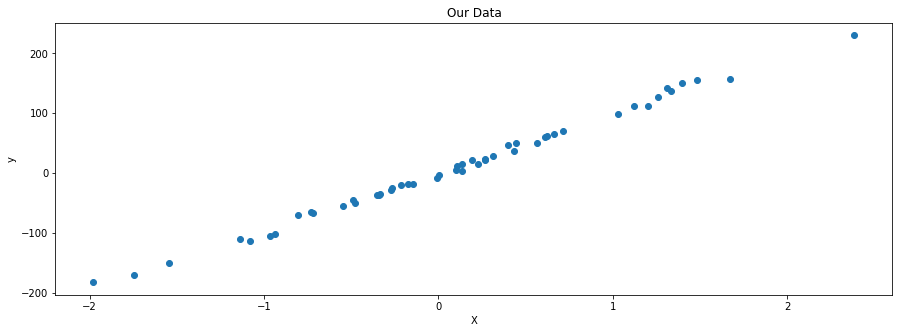

In [2]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.figure(figsize=(15, 5))

plt.scatter(X,y)
plt.title("Our Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Attach a vector of ones onto **X** to account for the bias value

In [3]:
ones = np.ones(shape = (50,1))
X = np.hstack((X,ones))


print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')


X shape:	(50, 2)
y shape:	(50,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to suffle the dataset using a **random_state** of 42

**Hint:** 

* This can be done easily with 2 calls to **train_test_split**. 

* The first call will split the data into train/test, and the second will split the train data into train/val

**Note:** 

Though we will have no use for the validation set in this question since we are merely concerned with creating all the required implementations at this time, it will be vital in the next question.

In [4]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.25, random_state = 42)

print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(30, 2)
xval shape:	(10, 2)
xtest shape:	(10, 2)	

ytrain shape:	(30,)
yval shape:	(10,)
ytest shape:	(10,)


### OLS

Define a function *get_loss* that takes the inputs X, y, and W and calculates the loss required (MSE). Its skeleton is shown below.

For full credit, create a vectorized implementation (no for loops).

In [8]:
def get_loss(X, y, W):
    X = np.transpose(X)   #makes X 2xn
    y_hat = np.dot(np.transpose(W),X)
    y_difference = y - y_hat
    loss = np.square(y_difference).mean()
    return loss

Using the derivation done in class, implement the closed form solution for ordinary least squares.

Do this by defining a function *OLS* that takes the inputs $\mathbf{X}$ and $\mathbf{y}$ and returns $\mathbf{w}$. Its skeleton is shown below.

For full credit, do not use the inverse function

**Hint:** you may want to look into *numpy.linalg.solve* 

In [5]:
def OLS(X, y):
    X_t = np.transpose(X)
    a = np.dot(X_t, X)
    b = np.dot(X_t, y)
    W = np.linalg.solve(a, b)

    return W

W_ols = OLS(xtrain, ytrain)
print("W_ols:", W_ols)

W_ols: [ 1.01054998e+02 -8.83448668e-02]


Create the following plots:
* a scatter plot of the training data overlayed by the OLS solution
* a scatter plot of the testing data overlayed by the OLS solution 

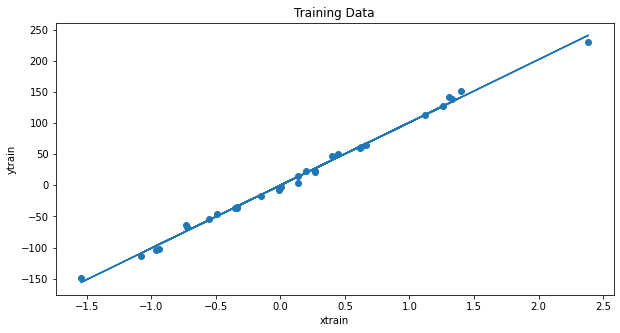

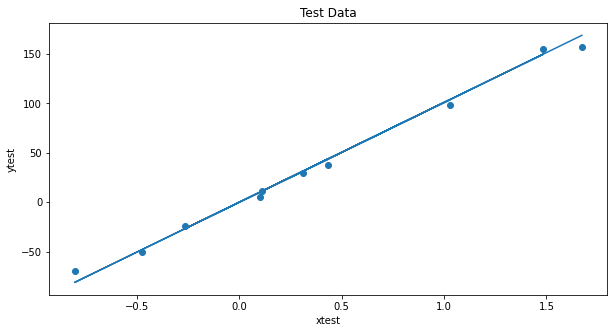

In [6]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.figure(figsize=(10, 5))

plt.scatter(xtrain[:,0], ytrain)      
plt.plot(xtrain, W_ols * xtrain)
plt.title("Training Data")
plt.xlabel("xtrain")
plt.ylabel("ytrain")
plt.show()


plt.figure(figsize=(10, 5))

plt.scatter(xtest[:,0], ytest)      
plt.plot(xtest, W_ols * xtest)
plt.title("Test Data")
plt.xlabel("xtest")
plt.ylabel("ytest")
plt.show()



Compute training loss and testing loss using the *get_loss* function you have previously defined 

In [9]:
loss_train = get_loss(xtrain, ytrain, W_ols)
loss_test = get_loss(xtest, ytest, W_ols)

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 31.058137679214592
Testing Loss: 42.851876889248445


### Ridge

Define a function *get_ridge_loss* that takes the inputs X, y, W, and $\lambda$ and calculates the loss required (MSE with L2 regularization). 

Its skeleton is shown below.

For full credit, create a vectorized implementation (no for loops).

In [10]:
def get_ridge_loss(X, y, W, lmda):
    X = np.transpose(X)
    y_hat = np.dot(np.transpose(W),X)
    y_difference = y - y_hat
    MSE = np.square(y_difference).mean()
    regularizer = lmda * np.dot(np.transpose(W), W)
    loss = MSE + regularizer
    return loss

Using your derivation from question 1, implement the closed form solution for ridge regression.

Do this by defining a function *ridge* that takes the inputs $\mathbf{X}$, $\mathbf{y}$, and $\lambda$ and returns $\mathbf{w}$. Its skeleton is shown below.

For full credit, do not use the inverse function

For now, we will set $\lambda = 0.1$. 
This performance will not be optimal, but we will worry about this later

In [11]:
def ridge(X, y, lmda):
    rows =  len(X[0])
    X_t = np.transpose(X)   #transposed X is nx2
    a = np.dot(X_t, X) + lmda * np.identity(rows)
    b = np.dot (X_t, y)
    W = np.linalg.solve(a, b)

    return W

lmda = 0.1
W_ridge = ridge(xtrain, ytrain, lmda)
print("W_ridge:", W_ridge)

W_ridge: [ 1.00606862e+02 -2.34634212e-02]


Create the following plots:
* a scatter plot of the training data overlayed by the ridge solution
* a scatter plot of the testing data overlayed by the ridge solution 

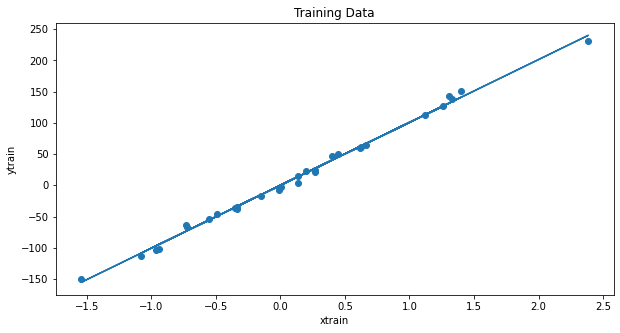

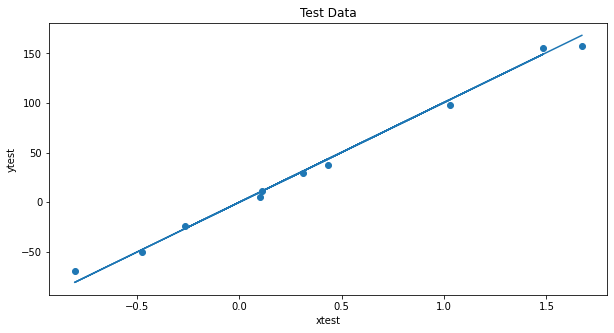

In [12]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.figure(figsize=(10, 5))

plt.scatter(xtrain[:,0], ytrain)      
plt.plot(xtrain, W_ridge * xtrain)
plt.title("Training Data")
plt.xlabel("xtrain")
plt.ylabel("ytrain")
plt.show()


plt.figure(figsize=(10, 5))

plt.scatter(xtest[:,0], ytest)      
plt.plot(xtest, W_ridge * xtest)
plt.title("Test Data")
plt.xlabel("xtest")
plt.ylabel("ytest")
plt.show()


Compute training loss and testing loss using the *get_ridge_loss* function you have previously defined 

In [13]:
loss_train = get_ridge_loss(xtrain,ytrain,W_ridge,lmda)
loss_test = get_ridge_loss(xtest,ytest,W_ridge,lmda)

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 1043.3825438223294
Testing Loss: 1052.5995501130883


### Verifying Results

Use sklearn's pre-built OLS model on our dataset and verify that your implementation matches its result

Do this by printing $w_{ols}$ from your implementation and sklearn's implementation

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Previous result
W_ols = OLS(xtrain, ytrain)
print("W_ols:", W_ols)

# Sklearn result
W_ols_sklearn = LinearRegression()

# Fit Sklearn Model
# -- Code Required --
W_ols_sklearn.fit(xtrain,ytrain)

print("W_ols_sklearn", W_ols_sklearn.coef_[:-1], W_ols_sklearn.intercept_)

W_ols: [ 1.01054998e+02 -8.83448668e-02]
W_ols_sklearn [101.05499781] -0.08834486680807707


Use scklearn's pre-built Ridge model on our dataset and verify that your implementation matches its result.

Use the same $\lambda = 0.1$ from the previous section

Do this by printing $w_{ridge}$ from your implementation and sklearn's implementation

In [15]:
from sklearn.linear_model import Ridge

# Previous result
W_ridge = ridge(xtrain, ytrain, lmda)
print("W_ridge:", W_ridge)

# Sklearn result
W_ridge_sklearn = Ridge(alpha=0.1)

# Fit Sklearn Model
# -- Code Required --
W_ridge_sklearn.fit(xtrain,ytrain)

print("W_ridge_sklearn", W_ridge_sklearn.coef_[:-1], W_ridge_sklearn.intercept_)

W_ridge: [ 1.00606862e+02 -2.34634212e-02]
W_ridge_sklearn [100.60687668] -0.02354380831199343


## **Question 4:** Hyperparameter Tuning

Throughout this question, we will be interested in tuning the hyper parameter $\lambda$ in ridge regression. And showing ridge's impact vs regular OLS.

To do this, we will need a more complex dataset. One which has many redundant, non-informative dimensions. So we will be defining a new synthetic dataset using the code below.

Our dataset will have 50 samples, and 1000 features.

In [16]:
import numpy as np
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1000,
    n_informative=2,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=10
)
y = abs(y)
print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 1000)
y shape:	(50,)


Attach a vector of ones onto **X** to account for the bias value

In [17]:
ones = np.ones(shape = (len(X),1))
print(ones.shape)
X = np.hstack((X,ones))

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

(50, 1)
X shape:	(50, 1001)
y shape:	(50,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to suffle the dataset using a **random_state** of 42

**Hint:** 

* This can be done easily with 2 calls to **train_test_split**. 

* The first call will split the data into train/test, and the second will split the train data into train/val


In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.25, random_state = 42)

print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(30, 1001)
xval shape:	(10, 1001)
xtest shape:	(10, 1001)	

ytrain shape:	(30,)
yval shape:	(10,)
ytest shape:	(10,)


### OLS

Using your implementation from the previous question,
get the OLS solution on this dataset.

In [19]:
W_ols = OLS(xtrain,ytrain)
print("W_ols:", W_ols[:10])    # For the sake of cleanliness we will only print first 10 coefficients

W_ols: [ -13.26861093  298.01003142 -127.44260886  106.46641054  303.01110206
 -131.63697552   80.12829674 -289.14061156 -444.02100392  -72.2118103 ]


Using your loss function from the previous question, obtain the train, val, and test losses of OLS.

Is this solution over fitting the data? Explain.

In [20]:
loss_train = get_loss(xtrain, ytrain, W_ols)
loss_val = get_loss(xval, yval, W_ols)
loss_test = get_loss(xtest, ytest, W_ols)

print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 9.283699787792093e-24
Validation Loss: 14675023.61521715
Testing Loss: 16883461.08343602


**Answer**
Yes, the solution is overfitting the data because the training loss is much smaller than the validation loss and the testing loss. So the solution is well fitted to the training data, but it does not generalize well to the other data. 

### Ridge

Using your implementation from the previous question, and your validations data, tune the $\lambda$ parameter of ridge regression. 

Do this by creating a loop that varies $\lambda$ from 10e-20 to 10e-1 in factors of 10.

On each iteration 
* calculate W_ridge using your previous implementation
* calculate training and validation loss
* store the training loss, validation loss, and $\lambda$ value. These will be needed for the coming plots.

In [21]:
train_loss_arr = []
val_loss_arr = []
lmdas = []

# -- Code Required --

current_lmda = 10E-20

while current_lmda <= 10E0:
    W_ridge = ridge(xtrain, ytrain, current_lmda)
    loss_train = get_ridge_loss(xtrain,ytrain,W_ridge,current_lmda)
    loss_val = get_ridge_loss(xval,yval,W_ridge,current_lmda)
    train_loss_arr.append(loss_train)
    val_loss_arr.append(loss_val)
    lmdas.append(current_lmda)
    current_lmda = current_lmda * 10


Create a plot of the losses as a function of lamda

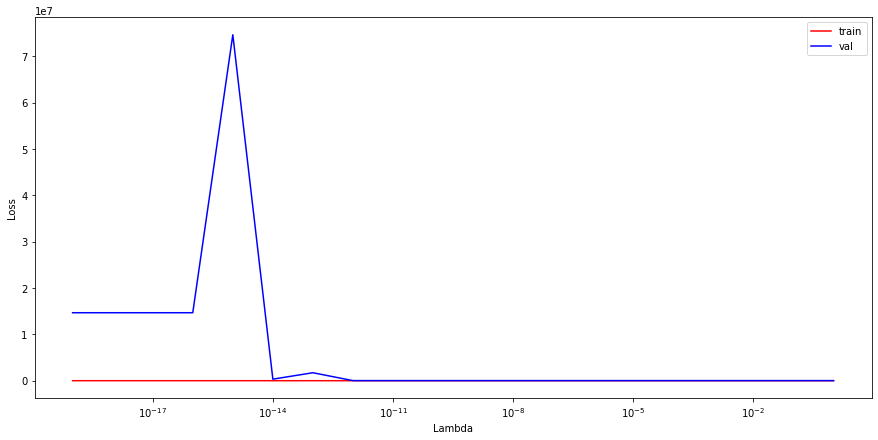

In [22]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.figure(figsize=(15, 7))
plt.plot(lmdas, train_loss_arr, color = 'red', label= 'train')
plt.plot(lmdas, val_loss_arr, color = 'blue', label = 'val')
plt.xscale('log')
plt.legend(loc="upper right")
plt.xlabel("Lambda")
plt.ylabel("Loss")
plt.show()



Identify the best lambda $\lambda^*$, and train your final classifier $W^*_{ridge}$ on both the training and the validation data together.

In [23]:
# Identifying lambda_star
lmda_star = lmdas[val_loss_arr.index(min(val_loss_arr))]

# Creating final xtrain and ytrain
xtrain_final = np.vstack((xtrain,xval))
ytrain_final = np.concatenate([ytrain,yval])

# Calculating W_ridge_star
W_ridge_star = ridge(xtrain_final, ytrain_final, lmda_star)

print("lmda_star:", lmda_star)
print("W_ridge_star:", W_ridge_star[:10]) # For the sake of cleanliness we will only print first 10 coefficients

lmda_star: 1.0000000000000003e-09
W_ridge_star: [ 0.3665771  -0.56241768  1.71956546 -0.51824779  0.60807615 -0.43755518
 -0.82181921  0.03306205  0.88506299 -0.95328715]


Using your loss function *get_ridge_loss* from the previous question, obtain the train, val, and test losses of $W_{ridge}^*$. Then answer the following questions:
* Are we overfitting the dataset? Explain.
* How are we performing compared to OLS

In [24]:
loss_train = get_ridge_loss(xtrain, ytrain, W_ridge_star, lmda_star)
loss_val = get_ridge_loss(xval, yval, W_ridge_star, lmda_star)
loss_test = get_ridge_loss(xtest, ytest, W_ridge_star, lmda_star)

print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 4.175842571022058e-07
Validation Loss: 4.1758425710221813e-07
Testing Loss: 8237.190780112856


**Answer**
 We are still overfitting the data set since the testing loss is much larger than the training loss. However, the training loss and the validation loss are the same, and we are overfitting much less than when we used OLS. With OLS the difference between training loss and validation/testing loss was much larger. With OLS, the training loss was even smaller, and the validation/testing loss were both much larger. Therefore, our solution here is much better, although still overfitting.